In [165]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

df = pd.read_csv('marketing_sample_for_easemytrip_in-easemytrip_flights_fares__20200401_20200630__30k_data.csv')

In [166]:
df['Current Date'] = pd.to_datetime(df['Crawl Timestamp']).apply(lambda x: x.date())
df['Departure Date'] = pd.to_datetime(df['Departure Date']).apply(lambda x: x.date())
df['Days Left'] = (df['Departure Date'] - df['Current Date']).apply(lambda x: x.days)
df.head()

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Current Date,Days Left
0,53f192419756cfa95baa4745067354f5,2020-04-01 01:23:42 +0000,Delhi,Patna,NaN,NaN,Guwahati,SpiceJet|SpiceJet,SG-8751|SG-426,2020-04-23,13:10,23Apr2020,22:00,08h 50m,1,4378.0,2020-04-01,22
1,7bb845050e88cc6a4f17abf24794c73b,2020-04-01 00:59:51 +0000,Mumbai,Bangalore,Delhi,NaN,Kochi,Vistara|Vistara|Vistara,UK-851|UK-812|UK-885,2020-04-18,07:00,18Apr2020,19:10,12h 10m,2,7465.0,2020-04-01,17
2,c9a84cc24d8a350eb41555c7bb76def6,2020-04-01 00:56:35 +0000,Ahmedabad,Delhi,Kolkata,NaN,Guwahati,Air India|Air India|Air India,AI-18|AI-401|AI-729,2020-04-25,07:10,26Apr2020,11:05,27h 55m,2,6179.0,2020-04-01,24
3,0c0a87ac2229b8c3f1b322baf1fc9f4e,2020-04-01 00:42:35 +0000,Kolkata,Delhi,NaN,NaN,Kochi,SpiceJet|SpiceJet,SG-254|SG-8561,2020-04-16,18:00,17Apr2020,11:10,17h 10m,1,5226.0,2020-04-01,15
4,b8f8af12fd6d9bf2f24389f26488478c,2020-04-01 01:52:13 +0000,Indore,Mumbai,NaN,NaN,Chennai,Indigo|Indigo,6E-5321|6E-323,2020-04-18,07:25,18Apr2020,13:35,06h 10m,1,3333.0,2020-04-01,17


In [ ]:
def get_date_diff(date_col1, date_col2):
    date_col1 = date_col1

In [167]:
# Get number of stops
stops = df[['Layover1', 'Layover2', 'Layover3']].notna().sum(axis=1)
stops = pd.DataFrame(stops, columns=['stops'])
df = pd.concat([df, stops], axis=1)
df


,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Current Date,Days Left,stops
0,53f192419756cfa95baa4745067354f5,2020-04-01 01:23:42 +0000,Delhi,Patna,NaN,NaN,Guwahati,SpiceJet|SpiceJet,SG-8751|SG-426,2020-04-23,13:10,23Apr2020,22:00,08h 50m,1,4378.0,2020-04-01,22,1
1,7bb845050e88cc6a4f17abf24794c73b,2020-04-01 00:59:51 +0000,Mumbai,Bangalore,Delhi,NaN,Kochi,Vistara|Vistara|Vistara,UK-851|UK-812|UK-885,2020-04-18,07:00,18Apr2020,19:10,12h 10m,2,7465.0,2020-04-01,17,2
2,c9a84cc24d8a350eb41555c7bb76def6,2020-04-01 00:56:35 +0000,Ahmedabad,Delhi,Kolkata,NaN,Guwahati,Air India|Air India|Air India,AI-18|AI-401|AI-729,2020-04-25,07:10,26Apr2020,11:05,27h 55m,2,6179.0,2020-04-01,24,2
3,0c0a87ac2229b8c3f1b322baf1fc9f4e,2020-04-01 00:42:35 +0000,Kolkata,Delhi,NaN,NaN,Kochi,SpiceJet|SpiceJet,SG-254|SG-8561,2020-04-16,18:00,17Apr2020,11:10,17h 10m,1,5226.0,2020-04-01,15,1
4,b8f8af12fd6d9bf2f24389f26488478c,2020-04-01 01:52:13 +0000,Indore,Mumbai,NaN,NaN,Chennai,Indigo|Indigo,6E-5321|6E-323,2020-04-18,07:25,18Apr2020,13:35,06h 10m,1,3333.0,2020-04-01,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,35c0bbbb50478edb124b6987ae54864a,2020-04-01 01:50:52 +0000,Ranchi,Delhi,NaN,NaN,Chennai,Indigo|Indigo,6E-436|6E-2162,2020-04-18,14:50,18Apr2020,23:35,08h 45m,1,4161.0,2020-04-01,17,1
29996,80c354a117f6abea283fd44dd25a95d6,2020-04-01 01:11:27 +0000,Ahmedabad,Pune,NaN,NaN,Bengaluru,SpiceJet|SpiceJet,SG-6630|SG-517,2020-04-16,04:00,16Apr2020,17:05,13h 05m,1,2145.0,2020-04-01,15,1
29997,e26c8fd1922e77256b458da1c5895074,2020-04-01 00:57:21 +0000,Mumbai,Delhi,NaN,NaN,Ranchi,Vistara|Vistara,UK-970|UK-751,2020-04-18,08:45,19Apr2020,09:55,25h 10m,1,5009.0,2020-04-01,17,1
29998,6a81ee6ea557a970dab4499550f27a6c,2020-04-01 01:46:12 +0000,Bhopal,Raipur,Mumbai,NaN,Shirdi,Air India|Air India|Air India,AI-9683|AI-651|AI-9653,2020-04-16,07:50,17Apr2020,16:10,32h 20m,2,11378.0,2020-04-01,15,2


In [168]:

# diff = pd.to_datetime(df['Departure Date']).apply(lambda x: x.date()) - pd.to_datetime(df['Crawl Timestamp']).apply(lambda x: x.date())

In [201]:
set([1,2,3])

{1, 2, 3}

In [169]:
# Encode airlines
airline_df = df['Flight Operator'].str.split('|', expand=True)
airlines = set()
for col in airline_df.columns:
    airlines = airlines.union(airline_df[col])
onehot = pd.DataFrame(airlines).set_index(keys=0).T

for i in df.index:
    # Split the Flight Operator field of that row
    airlines = df.loc[i, 'Flight Operator'].split('|')
    for airline in airlines:
        try:
            onehot.loc[i, airline] += 1
        except KeyError:
            onehot.loc[i, airline] = 1

# onehot.loc[1,'Gulf Airways'] = 1
# onehot.loc[2,'Gulf Airways'] = 1
onehot = onehot.fillna(0)
onehot

,LOT Polish Airlines,Singapore Airlines,Gulf Airways,Air Dolomiti,Kenya Airways,Saudi Arabian Airlines,Sichuan Airlines,National Air Services,Qantas Airways,AirArabia,...,Shanghai Airlines,United Airlines,Royal Jordanian,Jeju Air,EVA Airways,Eurowings,FlyDubai,WestJet Airlines,KLM Airlines,Indigo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
onehot.loc[30000, 'Gulf Airways'] = 1
onehot.loc[30000, 'Air Dolomiti'] + 1
# onehot

nan

In [170]:
df = pd.concat([df, onehot], axis=1)
df

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,...,Shanghai Airlines,United Airlines,Royal Jordanian,Jeju Air,EVA Airways,Eurowings,FlyDubai,WestJet Airlines,KLM Airlines,Indigo
0,53f192419756cfa95baa4745067354f5,2020-04-01 01:23:42 +0000,Delhi,Patna,NaN,NaN,Guwahati,SpiceJet|SpiceJet,SG-8751|SG-426,2020-04-23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7bb845050e88cc6a4f17abf24794c73b,2020-04-01 00:59:51 +0000,Mumbai,Bangalore,Delhi,NaN,Kochi,Vistara|Vistara|Vistara,UK-851|UK-812|UK-885,2020-04-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,c9a84cc24d8a350eb41555c7bb76def6,2020-04-01 00:56:35 +0000,Ahmedabad,Delhi,Kolkata,NaN,Guwahati,Air India|Air India|Air India,AI-18|AI-401|AI-729,2020-04-25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0c0a87ac2229b8c3f1b322baf1fc9f4e,2020-04-01 00:42:35 +0000,Kolkata,Delhi,NaN,NaN,Kochi,SpiceJet|SpiceJet,SG-254|SG-8561,2020-04-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b8f8af12fd6d9bf2f24389f26488478c,2020-04-01 01:52:13 +0000,Indore,Mumbai,NaN,NaN,Chennai,Indigo|Indigo,6E-5321|6E-323,2020-04-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,35c0bbbb50478edb124b6987ae54864a,2020-04-01 01:50:52 +0000,Ranchi,Delhi,NaN,NaN,Chennai,Indigo|Indigo,6E-436|6E-2162,2020-04-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
29996,80c354a117f6abea283fd44dd25a95d6,2020-04-01 01:11:27 +0000,Ahmedabad,Pune,NaN,NaN,Bengaluru,SpiceJet|SpiceJet,SG-6630|SG-517,2020-04-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,e26c8fd1922e77256b458da1c5895074,2020-04-01 00:57:21 +0000,Mumbai,Delhi,NaN,NaN,Ranchi,Vistara|Vistara,UK-970|UK-751,2020-04-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,6a81ee6ea557a970dab4499550f27a6c,2020-04-01 01:46:12 +0000,Bhopal,Raipur,Mumbai,NaN,Shirdi,Air India|Air India|Air India,AI-9683|AI-651|AI-9653,2020-04-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
# Get the duration column
def get_duration(time_str):
    h, m = time_str.split(' ')
    h = h.strip('h')
    if h:
        h = float(h.strip('h'))
    else:
        h = 0
    m = m.strip('m')
    if m:
        m = float(m.strip('m'))
    else:
        m = 0
    duration = h + m/60
    return duration
df['duration'] = df['Total Time'].apply(get_duration)

08h 50m
12h 10m
27h 55m
17h 10m
06h 10m
17h 45m
33h 10m
10h 05m
16h 30m
04h 30m
07h 30m
35h 50m
02h 30m
39h 20m
16h 05m
06h 40m
19h 35m
08h 25m
04h 35m
01h 05m
02h 05m
24h 30m
14h 55m
21h 55m
29h 40m
25h 30m
28h 05m
34h 45m
04h 00m
14h 35m
08h 35m
21h 00m
07h 05m
16h 30m
08h 50m
08h 55m
22h 30m
18h 30m
26h 05m
08h 45m
22h 05m
37h 00m
22h 40m
14h 35m
15h 05m
42h 40m
01h 00m
07h 45m
23h 20m
09h 05m
16h 00m
04h 55m
06h 35m
08h 15m
20h 15m
19h 15m
09h 20m
08h 40m
09h 30m
13h 05m
08h 10m
07h 45m
06h 55m
07h 15m
20h 25m
14h 50m
10h 30m
15h 15m
01h 10m
07h 45m
21h 40m
25h 00m
18h 00m
08h 20m
06h 55m
38h 20m
12h 25m
25h 20m
02h 20m
13h 25m
54h 30m
19h 15m
37h 40m
38h 12m
05h 25m
12h 45m
11h 35m
16h 55m
16h 55m
14h 25m
40h 00m
28h 05m
05h 10m
12h 55m
01h 30m
12h 55m
02h 15m
13h 30m
08h 25m
06h 25m
27h 40m
09h 30m
22h 45m
31h 25m
06h 35m
06h 05m
37h 10m
25h 55m
13h 25m
29h 05m
23h 00m
31h 15m
08h 05m
13h 05m
03h 15m
26h 00m
37h 20m
16h 15m
08h 50m
27h 15m
15h 35m
28h 35m
14h 25m
28h 50m
25h 35m


35h 20m
06h 35m
26h 15m
18h 35m
07h 40m
18h 55m
06h 40m
15h 20m
07h 25m
16h 25m
07h 10m
26h 15m
09h 50m
18h 35m
35h 55m
01h 25m
22h 30m
11h 55m
23h 40m
11h 40m
15h 00m
07h 20m
12h 00m
19h 20m
07h 35m
17h 40m
38h 45m
09h 10m
28h 15m
12h 00m
14h 45m
14h 25m
12h 40m
02h 00m
05h 00m
13h 40m
07h 35m
12h 30m
07h 15m
11h 55m
08h 30m
10h 50m
13h 00m
16h 15m
09h 00m
27h 30m
20h 30m
17h 55m
08h 45m
24h 35m
03h 40m
07h 45m
12h 55m
18h 05m
16h 40m
02h 05m
24h 25m
27h 30m
38h 40m
22h 15m
14h 30m
10h 50m
15h 15m
21h 10m
06h 45m
28h 05m
04h 30m
33h 55m
04h 50m
10h 25m
07h 00m
26h 35m
15h 30m
14h 35m
28h 10m
22h 10m
16h 45m
28h 20m
07h 20m
08h 00m
12h 25m
01h 35m
26h 40m
27h 05m
01h 45m
13h 15m
23h 20m
16h 45m
18h 45m
06h 15m
06h 00m
23h 20m
02h 10m
19h 30m
16h 45m
06h 30m
15h 15m
06h 35m
05h 00m
18h 20m
16h 05m
04h 35m
10h 05m
03h 55m
01h 00m
22h 25m
24h 00m
07h 15m
08h 10m
09h 20m
09h 30m
9h 45m
29h 25m
22h 10m
05h 40m
18h 40m
02h 35m
27h 15m
15h 45m
12h 05m
09h 50m
23h 15m
14h 15m
20h 25m
15h 35m
0

24h 45m
15h 45m
30h 45m
22h 45m
06h 20m
19h 50m
25h 40m
22h 05m
12h 05m
23h 55m
27h 35m
01h 15m
06h 40m
01h 15m
05h 00m
25h 45m
15h 05m
23h 20m
08h 45m
23h 05m
15h 10m
08h 00m
24h 15m
24h 35m
05h 10m
19h 40m
01h 20m
13h 35m
32h 25m
06h 25m
02h 25m
14h 20m
20h 55m
18h 45m
16h 20m
26h 10m
01h 10m
25h 10m
05h 00m
28h 05m
21h 35m
21h 40m
05h 45m
18h 50m
17h 55m
39h 45m
11h 15m
09h 55m
08h 50m
07h 00m
05h 45m
30h 25m
25h 50m
16h 40m
38h 10m
09h 25m
05h 55m
25h 50m
09h 45m
04h 00m
09h 45m
06h 35m
27h 40m
28h 25m
25h 45m
20h 20m
29h 20m
23h 15m
28h 50m
13h 30m
06h 40m
09h 25m
18h 45m
09h 15m
26h 25m
06h 55m
15h 05m
01h 40m
06h 25m
06h 30m
08h 35m
09h 00m
02h 45m
25h 25m
10h 25m
18h 00m
19h 35m
08h 05m
10h 15m
25h 25m
01h 15m
29h 10m
17h 35m
20h 50m
08h 45m
16h 00m
17h 22m
23h 30m
05h 45m
27h 15m
10h 40m
34h 55m
04h 55m
20h 35m
27h 30m
39h 10m
08h 45m
09h 30m
26h 15m
06h 00m
13h 05m
07h 15m
14h 20m
15h 55m
07h 55m
07h 45m
22h 35m
18h 25m
07h 30m
08h 05m
13h 10m
17h 00m
21h 05m
05h 25m
08h 30m


05h 05m
10h 20m
19h 05m
06h 55m
16h 50m
08h 10m
21h 30m
21h 55m
08h 45m
24h 40m
13h 15m
30h 05m
33h 30m
03h 30m
13h 15m
23h 15m
27h 50m
23h 00m
22h 30m
10h 25m
07h 15m
24h 40m
04h 50m
32h 45m
09h 40m
11h 50m
19h 20m
15h 30m
37h 05m
07h 05m
13h 00m
05h 45m
23h 25m
02h 00m
37h 45m
20h 15m
04h 10m
08h 30m
12h 05m
10h 25m
06h 35m
10h 45m
25h 10m
10h 30m
05h 40m
23h 30m
22h 40m
25h 05m
20h 00m
21h 55m
06h 05m
05h 45m
12h 20m
11h 05m
18h 20m
25h 35m
25h 15m
14h 00m
25h 05m
23h 50m
06h 00m
43h 55m
29h 10m
17h 20m
25h 00m
10h 30m
30h 00m
10h 30m
11h 35m
14h 10m
31h 10m
28h 15m
02h 55m
26h 25m
08h 10m
09h 00m
48h 15m
24h 25m
24h 35m
05h 45m
21h 20m
34h 35m
24h 15m
10h 50m
28h 15m
13h 35m
15h 30m
17h 35m
33h 55m
08h 55m
24h 15m
20h 45m
09h 40m
06h 25m
11h 15m
06h 30m
06h 35m
10h 25m
07h 45m
35h 15m
33h 20m
23h 45m
10h 05m
24h 00m
14h 10m
19h 20m
25h 35m
05h 55m
20h 55m
23h 45m
19h 25m
21h 50m
10h 45m
04h 50m
02h 15m
08h 50m
05h 50m
15h 00m
01h 20m
39h 20m
07h 25m
32h 45m
32h 20m
13h 30m
38h 45m


17h 10m
09h 10m
07h 15m
15h 15m
04h 20m
20h 00m
25h 00m
07h 55m
02h 55m
15h 05m
21h 55m
10h 40m
33h 35m
08h 00m
26h 20m
11h 20m
04h 00m
33h 05m
12h 10m
10h 25m
08h 05m
32h 00m
16h 05m
17h 50m
31h 10m
01h 45m
28h 15m
05h 20m
05h 55m
26h 25m
11h 40m
13h 20m
28h 15m
25h 20m
24h 40m
05h 05m
17h 45m
19h 55m
15h 40m
23h 45m
20h 5m
27h 20m
28h 10m
21h 50m
32h 10m
19h 00m
9h 20m
01h 30m
13h 05m
20h 55m
22h 25m
08h 25m
39h 30m
07h 30m
8h 0m
12h 25m
29h 00m
03h 30m
05h 00m
07h 35m
16h 30m
34h 05m
36h 15m
29h 45m
30h 50m
17h 00m
26h 55m
19h 15m
24h 40m
01h 05m
18h 15m
29h 20m
06h 25m
11h 50m
14h 55m
23h 35m
06h 35m
07h 25m
10h 00m
06h 40m
24h 50m
28h 20m
07h 25m
09h 35m
30h 00m
20h 55m
28h 15m
12h 55m
06h 40m
26h 55m
12h 45m
19h 55m
02h 00m
22h 25m
26h 20m
15h 15m
25h 35m
19h 20m
24h 20m
24h 00m
07h 20m
07h 50m
04h 10m
8h 0m
05h 10m
27h 50m
06h 50m
16h 35m
19h 20m
19h 20m
18h 15m
06h 35m
08h 20m
11h 55m
20h 30m
37h 25m
31h 10m
16h 55m
01h 10m
17h 20m
10h 50m
30h 50m
11h 30m
09h 55m
19h 15m
15h 05

15h 05m
15h 05m
12h 25m
01h 25m
24h 55m
34h 15m
24h 35m
39h 05m
27h 00m
21h 50m
19h 15m
06h 30m
05h 05m
18h 30m
19h 00m
26h 35m
27h 15m
28h 50m
28h 35m
18h 55m
14h 50m
05h 35m
16h 35m
05h 35m
07h 35m
09h 15m
40h 40m
35h 45m
23h 35m
13h 10m
38h 25m
24h 10m
24h 35m
24h 30m
25h 50m
10h 30m
29h 20m
27h 35m
20h 20m
01h 35m
03h 05m
08h 10m
21h 35m
09h 30m
12h 25m
17h 25m
10h 05m
37h 10m
20h 55m
17h 45m
46h 25m
08h 30m
25h 00m
23h 10m
13h 30m
09h 25m
09h 35m
06h 25m
30h 50m
08h 05m
02h 10m
26h 55m
09h 55m
16h 25m
15h 20m
18h 00m
05h 05m
18h 30m
33h 30m
05h 35m
24h 00m
16h 40m
11h 50m
30h 45m
15h 40m
27h 50m
13h 15m
10h 00m
16h 45m
11h 00m
25h 10m
04h 45m
18h 15m
36h 05m
05h 10m
16h 35m
04h 15m
17h 20m
28h 50m
09h 20m
11h 40m
21h 10m
09h 20m
20h 40m
19h 40m
24h 55m
40h 45m
21h 10m
31h 30m
26h 15m
15h 05m
25h 45m
06h 20m
38h 15m
09h 20m
27h 50m
18h 35m
04h 20m
26h 05m
14h 20m
31h 10m
30h 10m
40h 45m
29h 20m
01h 25m
10h 15m
24h 00m
04h 45m
25h 00m
19h 10m
12h 25m
35h 40m
18h 15m
32h 45m
17h 15m


24h 35m
15h 25m
26h 00m
05h 25m
44h 05m
02h 25m
19h 20m
36h 55m
26h 30m
10h 10m
06h 00m
01h 45m
05h 25m
01h 05m
34h 50m
05h 30m
20h 20m
12h 00m
25h 00m
05h 00m
18h 10m
03h 15m
07h 45m
15h 05m
28h 30m
06h 40m
27h 15m
35h 20m
13h 55m
19h 15m
19h 30m
36h 25m
27h 30m
20h 30m
02h 30m
12h 55m
05h 40m
19h 30m
11h 35m
07h 20m
04h 05m
23h 55m
20h 55m
12h 35m
09h 25m
06h 30m
20h 25m
05h 20m
05h 40m
26h 00m
14h 05m
21h 45m
07h 40m
24h 40m
24h 25m
27h 50m
22h 40m
16h 25m
17h 15m
05h 50m
12h 40m
16h 25m
06h 45m
13h 10m
29h 40m
30h 15m
08h 30m
04h 50m
08h 55m
05h 35m
41h 10m
27h 20m
19h 45m
25h 00m
10h 10m
07h 35m
07h 00m
10h 15m
15h 35m
15h 00m
07h 55m
12h 45m
06h 05m
10h 45m
27h 45m
24h 45m
23h 00m
17h 30m
01h 30m
19h 50m
37h 10m
21h 45m
08h 10m
21h 05m
29h 15m
19h 15m
22h 15m
11h 15m
06h 10m
04h 05m
12h 00m
13h 40m
26h 35m
07h 35m
30h 55m
28h 00m
12h 35m
06h 30m
21h 15m
20h 55m
32h 55m
21h 20m
31h 20m
14h 30m
26h 00m
08h 55m
08h 25m
20h 35m
06h 40m
11h 05m
10h 50m
14h 00m
08h 00m
35h 00m
08h 45m


11h 15m
19h 40m
10h 30m
04h 40m
09h 20m
01h 55m
06h 10m
25h 50m
17h 00m
32h 40m
29h 30m
27h 55m
05h 30m
26h 20m
09h 20m
23h 10m
19h 35m
13h 55m
25h 45m
30h 00m
02h 40m
13h 00m
12h 30m
04h 50m
20h 10m
19h 45m
38h 05m
05h 50m
05h 10m
28h 25m
05h 35m
18h 05m
15h 00m
07h 20m
25h 50m
26h 10m
22h 00m
20h 45m
29h 10m
25h 40m
08h 00m
04h 25m
06h 40m
10h 40m
25h 45m
08h 35m
35h 30m
33h 05m
34h 25m
20h 15m
21h 35m
32h 45m
13h 20m
06h 30m
11h 50m
25h 45m
22h 15m
22h 20m
29h 25m
19h 35m
04h 30m
01h 35m
08h 10m
26h 45m
06h 30m
19h 05m
35h 35m
03h 10m
12h 50m
23h 30m
26h 00m
30h 50m
32h 55m
19h 45m
21h 25m
25h 35m
17h 15m
57h 25m
05h 55m
05h 10m
27h 05m
17h 10m
09h 30m
14h 15m
02h 25m
03h 50m
04h 00m
01h 15m
08h 25m
08h 20m
29h 55m
08h 00m
08h 15m
08h 15m
25h 50m
22h 25m
01h 45m
07h 10m
07h 00m
06h 45m
23h 20m
31h 05m
23h 15m
35h 20m
15h 35m
32h 40m
9h 5m
07h 35m
05h 50m
08h 50m
07h 15m
13h 20m
19h 00m
08h 35m
06h 15m
24h 10m
34h 10m
04h 50m
13h 05m
07h 00m
19h 30m
16h 30m
23h 00m
14h 35m
04h 50m
07

24h 00m
09h 00m
29h 05m
08h 30m
03h 10m
09h 35m
25h 55m
17h 40m
02h 50m
31h 10m
25h 55m
07h 25m
25h 55m
07h 05m
15h 50m
22h 50m
17h 25m
15h 55m
15h 50m
05h 40m
16h 35m
14h 30m
06h 20m
28h 10m
07h 15m
24h 00m
36h 35m
07h 40m
14h 45m
22h 25m
42h 40m
10h 35m
19h 55m
27h 50m
21h 10m
25h 20m
20h 20m
23h 00m
20h 20m
07h 00m
07h 30m
11h 50m
13h 45m
05h 50m
30h 40m
31h 50m
21h 10m
32h 50m
55h 10m
23h 40m
11h 40m
04h 30m
24h 10m
08h 50m
18h 35m
32h 20m
06h 55m
11h 50m
07h 20m
16h 15m
12h 25m
09h 00m
10h 50m
26h 30m
29h 15m
01h 20m
41h 25m
31h 30m
08h 50m
17h 40m
32h 30m
07h 25m
23h 20m
16h 15m
07h 20m
03h 50m
22h 30m
08h 25m
05h 10m
02h 15m
09h 45m
20h 35m
17h 45m
07h 05m
30h 50m
08h 45m
28h 50m
11h 30m
06h 30m
17h 40m
14h 05m
29h 00m
01h 45m
40h 55m
24h 10m
07h 30m
11h 15m
19h 35m
13h 35m
10h 45m
31h 30m
30h 10m
01h 45m
06h 35m
11h 25m
24h 50m
23h 45m
13h 40m
08h 10m
25h 20m
05h 55m
16h 10m
07h 45m
22h 20m
20h 30m
34h 30m
05h 05m
15h 40m
20h 30m
05h 30m
13h 30m
22h 45m
24h 15m
16h 40m
11h 05m


24h 25m
22h 10m
06h 30m
17h 25m
20h 40m
13h 55m
25h 25m
02h 20m
20h 00m
04h 35m
27h 25m
05h 00m
23h 00m
09h 55m
23h 30m
27h 35m
10h 10m
17h 30m
12h 55m
08h 30m
10h 20m
07h 30m
37h 30m
12h 35m
15h 25m
06h 35m
13h 20m
23h 50m
14h 25m
09h 05m
11h 55m
08h 45m
17h 25m
06h 55m
25h 25m
06h 15m
26h 20m
24h 00m
34h 10m
26h 20m
25h 00m
05h 20m
39h 00m
28h 20m
13h 50m
14h 30m
39h 05m
06h 45m
24h 05m
12h 25m
05h 25m
22h 05m
17h 20m
23h 45m
01h 05m
13h 05m
29h 20m
03h 35m
26h 25m
15h 40m
26h 35m
29h 35m
08h 10m
19h 45m
24h 20m
29h 25m
06h 40m
06h 30m
09h 45m
05h 05m
05h 10m
28h 35m
08h 50m
14h 35m
21h 30m
22h 00m
11h 15m
04h 00m
35h 25m
13h 05m
03h 55m
23h 15m
40h 55m
15h 45m
16h 50m
57h 10m
05h 05m
00h 50m
06h 55m
28h 05m
14h 40m
19h 15m
14h 05m
04h 40m
24h 35m
20h 45m
06h 45m
36h 30m
06h 40m
25h 25m
27h 25m
33h 10m
01h 40m
25h 25m
10h 10m
25h 55m
14h 45m
16h 10m
04h 55m
04h 35m
04h 45m
13h 30m
06h 00m
10h 35m
28h 10m
17h 15m
26h 55m
17h 55m
13h 05m
24h 35m
37h 45m
11h 50m
18h 15m
03h 25m
05h 55m


08h 30m
26h 00m
17h 50m
06h 10m
09h 15m
24h 05m
30h 40m
01h 00m
26h 25m
18h 05m
02h 20m
06h 35m
10h 40m
27h 40m
29h 45m
04h 50m
20h 15m
09h 55m
12h 45m
30h 35m
08h 30m
31h 10m
25h 25m
24h 10m
35h 15m
31h 20m
19h 45m
18h 20m
20h 30m
17h 15m
06h 40m
07h 30m
25h 20m
22h 40m
01h 15m
26h 40m
26h 20m
21h 55m
01h 55m
21h 05m
25h 50m
01h 05m
15h 25m
14h 05m
05h 10m
02h 15m
05h 00m
23h 20m
41h 30m
09h 45m
19h 10m
16h 35m
07h 35m
17h 45m
11h 40m
22h 50m
06h 55m
22h 00m
27h 35m
05h 20m
09h 05m
17h 00m
08h 00m
04h 50m
00h 45m
30h 50m
26h 55m
08h 15m
32h 35m
21h 55m
15h 05m
14h 30m
09h 05m
06h 05m
37h 15m
05h 15m
19h 10m
19h 15m
25h 35m
08h 25m
08h 50m
31h 10m
06h 30m
30h 35m
39h 10m
40h 05m
07h 50m
23h 10m
22h 00m
05h 20m
04h 30m
14h 35m
04h 20m
07h 35m
10h 10m
07h 00m
04h 35m
32h 20m
40h 20m
20h 10m
14h 40m
14h 45m
28h 40m
22h 30m
18h 25m
20h 15m
10h 25m
01h 35m
01h 45m
08h 50m
09h 50m
01h 35m
39h 40m
29h 05m
18h 00m
05h 25m
34h 40m
36h 45m
14h 45m
05h 00m
07h 25m
36h 00m
30h 15m
22h 55m
04h 15m


19h 15m
05h 10m
30h 15m
06h 35m
23h 30m
08h 25m
06h 25m
14h 00m
08h 10m
06h 00m
12h 35m
27h 05m
24h 20m
16h 10m
16h 35m
27h 55m
25h 20m
18h 15m
19h 10m
07h 55m
09h 00m
13h 50m
12h 20m
06h 50m
25h 30m
11h 15m
36h 25m
12h 0m
04h 25m
35h 40m
18h 40m
22h 40m
13h 30m
09h 30m
09h 05m
04h 40m
22h 45m
23h 00m
08h 40m
06h 00m
32h 10m
01h 05m
14h 40m
20h 50m
11h 55m
04h 45m
11h 15m
11h 15m
07h 40m
33h 35m
21h 15m
26h 25m
09h 15m
46h 41m
05h 05m
26h 45m
23h 10m
22h 05m
01h 45m
01h 20m
08h 30m
30h 10m
19h 15m
22h 10m
27h 00m
28h 10m
01h 05m
04h 20m
32h 20m
16h 40m
21h 35m
07h 50m
25h 15m
19h 10m
24h 15m
31h 20m
16h 00m
30h 00m
05h 50m
15h 15m
05h 10m
20h 20m
27h 00m
22h 10m
28h 45m
05h 30m
36h 10m
20h 05m
30h 20m
26h 20m
30h 45m
28h 10m
20h 05m
22h 15m
17h 50m
11h 10m
07h 15m
07h 25m
07h 00m
04h 55m
25h 45m
25h 45m
24h 55m
20h 55m
07h 20m
20h 05m
07h 15m
32h 30m
24h 45m
11h 20m
26h 15m
22h 15m
21h 00m
03h 15m
27h 40m
14h 55m
25h 00m
04h 40m
24h 05m
05h 15m
09h 05m
24h 15m
16h 00m
21h 45m
24h 15m
3

In [172]:
# Get the departure time of the day
def get_hour(time_str):
    h, m = time_str.split(':')
    h = int(h)
    m = int(m)
    if m > 30:
        h += 1
    if h == 24:
        h = 0
    return h
df['depart_hour'] = df['Departure Time'].apply(get_hour)

In [175]:
data = df.drop(['Uniq Id', 'Crawl Timestamp', 'Layover1', 'Layover2', 'Layover3','Flight Operator', 'Flight Number', \
               'Departure Date', 'Departure Time', 'Arrival Date', 'Arrival Time', 'Total Time', 'Current Date'], axis=1)

In [182]:
data = pd.get_dummies(data)

In [183]:
#Train test split
X = data.drop('Fare', axis=1)
y = data['Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

#Select best n_estimators
num_trees = []
oob_score = []
for i in range(20):
    n = (i + 1) * 10
    rm = RandomForestRegressor(n_estimators=n, random_state=123, n_jobs=-1, oob_score=True)
    rm.fit(X_train, y_train)
    num_trees.append(n)
    oob_score.append(rm.oob_score_)
    
plt.plot(num_trees, oob_score)
#Select the best_n from the plot.
best_n = 200



/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/zry/opt/anaconda3/lib/pyt

NameError: name 'plt' is not defined

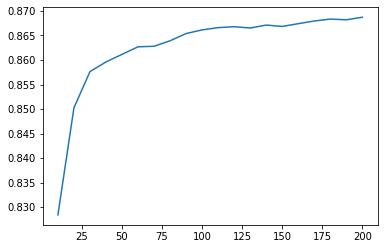

In [185]:
plt.plot(num_trees, oob_score)

In [191]:
print("MSE", mean_squared_error(y_test, rm.predict(X_test)))
print("MAE", mean_absolute_error(y_test, rm.predict(X_test)))
print("MAPE", mean_absolute_percentage_error(y_test, rm.predict(X_test)))

MSE 316755329.3108141
MAE 4415.450707876624
MAPE 0.15581740690079218


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [193]:
y_test.mean()

25483.352

In [196]:
#Train random forest model, and GridSearch the best params
rm = RandomForestRegressor(n_estimators=best_n, random_state=123, n_jobs=-1)
paramters = {
    "max_depth": [2, 4, 8, 10, 20, 40],
    "min_samples_split": [2, 4, 6, 8, 10, 20],
    "min_samples_leaf": [1, 10, 100]
}
# verbose=3 to monitor the progree
cv = GridSearchCV(rm, paramters, verbose=3)
cv.fit(X_train, y_train)
cv.best_params_

#Output the evaluation metrics of the predictions on the validation set
print("MSE", mean_squared_error(y_test, cv.predict(X_test)))
print("MAE", mean_absolute_error(y_test, cv.predict(X_test)))
print("MAPE", mean_absolute_percentage_error(y_test, cv.predict(X_test)))


#Refit the model with the best param and whole dataset
# final_model = RandomForestRegressor(n_estimators=100, random_state=123, n_jobs=-1)
# final_model.fit(X, y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.374 total time=   2.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.353 total time=   1.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.431 total time=   1.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.443 total time=   1.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.374 total time=   1.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=4;, score=0.374 total time=   1.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=4;, score=0.353 total time=   1.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=4;, score=0.431 total time=   1.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=4;, score=0.443 total time=   1.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=4;, score=0.374 total time=   1.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=6;, score=0.374 total time=   1.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=6;, score=0.353 total time=   1.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=6;, score=0.431 total time=   1.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=6;, score=0.443 total time=   1.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=6;, score=0.374 total time=   1.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=8;, score=0.374 total time=   1.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=8;, score=0.353 total time=   1.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=8;, score=0.431 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=8;, score=0.443 total time=   1.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=8;, score=0.374 total time=   1.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=10;, score=0.374 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=10;, score=0.353 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=10;, score=0.431 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=10;, score=0.443 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=10;, score=0.374 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=20;, score=0.374 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=20;, score=0.353 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=20;, score=0.431 total time=   1.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=20;, score=0.443 total time=   1.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=20;, score=0.374 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=10, min_samples_split=2;, score=0.374 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=10, min_samples_split=2;, score=0.353 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=10, min_samples_split=2;, score=0.431 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=10, min_samples_split=2;, score=0.443 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=10, min_samples_split=2;, score=0.374 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=10, min_samples_split=4;, score=0.374 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=10, min_samples_split=4;, score=0.353 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=10, min_samples_split=4;, score=0.431 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=10, min_samples_split=4;, score=0.443 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=10, min_samples_split=4;, score=0.374 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=10, min_samples_split=6;, score=0.374 total time=   1.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=10, min_samples_split=6;, score=0.353 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=10, min_samples_split=6;, score=0.431 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=10, min_samples_split=6;, score=0.443 total time=   1.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=10, min_samples_split=6;, score=0.374 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=10, min_samples_split=8;, score=0.374 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=10, min_samples_split=8;, score=0.353 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=10, min_samples_split=8;, score=0.431 total time=   1.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=10, min_samples_split=8;, score=0.443 total time=   1.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=10, min_samples_split=8;, score=0.374 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=10, min_samples_split=10;, score=0.374 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=10, min_samples_split=10;, score=0.353 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=10, min_samples_split=10;, score=0.431 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=10, min_samples_split=10;, score=0.443 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=10, min_samples_split=10;, score=0.374 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=10, min_samples_split=20;, score=0.374 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=10, min_samples_split=20;, score=0.353 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=10, min_samples_split=20;, score=0.431 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=10, min_samples_split=20;, score=0.443 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=10, min_samples_split=20;, score=0.374 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=100, min_samples_split=2;, score=0.337 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=100, min_samples_split=2;, score=0.382 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=100, min_samples_split=2;, score=0.372 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=100, min_samples_split=2;, score=0.388 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=100, min_samples_split=2;, score=0.344 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=100, min_samples_split=4;, score=0.337 total time=   1.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=100, min_samples_split=4;, score=0.382 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=100, min_samples_split=4;, score=0.372 total time=   1.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=100, min_samples_split=4;, score=0.388 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=100, min_samples_split=4;, score=0.344 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=100, min_samples_split=6;, score=0.337 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=100, min_samples_split=6;, score=0.382 total time=   1.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=100, min_samples_split=6;, score=0.372 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=100, min_samples_split=6;, score=0.388 total time=   1.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=100, min_samples_split=6;, score=0.344 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=100, min_samples_split=8;, score=0.337 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=100, min_samples_split=8;, score=0.382 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=100, min_samples_split=8;, score=0.372 total time=   1.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=100, min_samples_split=8;, score=0.388 total time=   1.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=100, min_samples_split=8;, score=0.344 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=100, min_samples_split=10;, score=0.337 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=100, min_samples_split=10;, score=0.382 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=100, min_samples_split=10;, score=0.372 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=100, min_samples_split=10;, score=0.388 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=100, min_samples_split=10;, score=0.344 total time=   1.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=2, min_samples_leaf=100, min_samples_split=20;, score=0.337 total time=   1.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=2, min_samples_leaf=100, min_samples_split=20;, score=0.382 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=2, min_samples_leaf=100, min_samples_split=20;, score=0.372 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=2, min_samples_leaf=100, min_samples_split=20;, score=0.388 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=2, min_samples_leaf=100, min_samples_split=20;, score=0.344 total time=   1.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.516 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.514 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.559 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.573 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.519 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.516 total time=   2.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.514 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.559 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.573 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.519 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=6;, score=0.516 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=6;, score=0.514 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=6;, score=0.559 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=6;, score=0.572 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=6;, score=0.519 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=8;, score=0.516 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=8;, score=0.514 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=8;, score=0.559 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=8;, score=0.572 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=8;, score=0.519 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=0.516 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=0.514 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=0.559 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=0.572 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=10;, score=0.519 total time=   2.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=0.515 total time=   2.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=0.512 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=0.558 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=0.572 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=20;, score=0.518 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=10, min_samples_split=2;, score=0.515 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=10, min_samples_split=2;, score=0.504 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=10, min_samples_split=2;, score=0.559 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=10, min_samples_split=2;, score=0.567 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=10, min_samples_split=2;, score=0.521 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=10, min_samples_split=4;, score=0.515 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=10, min_samples_split=4;, score=0.504 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=10, min_samples_split=4;, score=0.559 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=10, min_samples_split=4;, score=0.567 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=10, min_samples_split=4;, score=0.521 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=10, min_samples_split=6;, score=0.515 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=10, min_samples_split=6;, score=0.504 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=10, min_samples_split=6;, score=0.559 total time=   2.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=10, min_samples_split=6;, score=0.567 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=10, min_samples_split=6;, score=0.521 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=10, min_samples_split=8;, score=0.515 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=10, min_samples_split=8;, score=0.504 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=10, min_samples_split=8;, score=0.559 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=10, min_samples_split=8;, score=0.567 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=10, min_samples_split=8;, score=0.521 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=10, min_samples_split=10;, score=0.515 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=10, min_samples_split=10;, score=0.504 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=10, min_samples_split=10;, score=0.559 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=10, min_samples_split=10;, score=0.567 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=10, min_samples_split=10;, score=0.521 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=10, min_samples_split=20;, score=0.515 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=10, min_samples_split=20;, score=0.504 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=10, min_samples_split=20;, score=0.559 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=10, min_samples_split=20;, score=0.567 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=10, min_samples_split=20;, score=0.521 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=100, min_samples_split=2;, score=0.461 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=100, min_samples_split=2;, score=0.485 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=100, min_samples_split=2;, score=0.473 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=100, min_samples_split=2;, score=0.490 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=100, min_samples_split=2;, score=0.437 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=100, min_samples_split=4;, score=0.461 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=100, min_samples_split=4;, score=0.485 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=100, min_samples_split=4;, score=0.473 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=100, min_samples_split=4;, score=0.490 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=100, min_samples_split=4;, score=0.437 total time=   2.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=100, min_samples_split=6;, score=0.461 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=100, min_samples_split=6;, score=0.485 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=100, min_samples_split=6;, score=0.473 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=100, min_samples_split=6;, score=0.490 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=100, min_samples_split=6;, score=0.437 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=100, min_samples_split=8;, score=0.461 total time=   2.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=100, min_samples_split=8;, score=0.485 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=100, min_samples_split=8;, score=0.473 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=100, min_samples_split=8;, score=0.490 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=100, min_samples_split=8;, score=0.437 total time=   2.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=100, min_samples_split=10;, score=0.461 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=100, min_samples_split=10;, score=0.485 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=100, min_samples_split=10;, score=0.473 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=100, min_samples_split=10;, score=0.490 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=100, min_samples_split=10;, score=0.437 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=4, min_samples_leaf=100, min_samples_split=20;, score=0.461 total time=   2.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=4, min_samples_leaf=100, min_samples_split=20;, score=0.485 total time=   2.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=4, min_samples_leaf=100, min_samples_split=20;, score=0.473 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=4, min_samples_leaf=100, min_samples_split=20;, score=0.490 total time=   1.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=4, min_samples_leaf=100, min_samples_split=20;, score=0.437 total time=   2.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=1, min_samples_split=2;, score=0.708 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=1, min_samples_split=2;, score=0.738 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=1, min_samples_split=2;, score=0.741 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=1, min_samples_split=2;, score=0.758 total time=   3.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=1, min_samples_split=2;, score=0.728 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=1, min_samples_split=4;, score=0.708 total time=   3.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=1, min_samples_split=4;, score=0.735 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=1, min_samples_split=4;, score=0.739 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=1, min_samples_split=4;, score=0.757 total time=   3.8s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=1, min_samples_split=4;, score=0.725 total time=   3.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=1, min_samples_split=6;, score=0.707 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=1, min_samples_split=6;, score=0.731 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=1, min_samples_split=6;, score=0.736 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=1, min_samples_split=6;, score=0.756 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=1, min_samples_split=6;, score=0.721 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=1, min_samples_split=8;, score=0.706 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=1, min_samples_split=8;, score=0.728 total time=   3.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=1, min_samples_split=8;, score=0.733 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=1, min_samples_split=8;, score=0.754 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=1, min_samples_split=8;, score=0.716 total time=   3.8s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=1, min_samples_split=10;, score=0.704 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=1, min_samples_split=10;, score=0.724 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=1, min_samples_split=10;, score=0.731 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=1, min_samples_split=10;, score=0.752 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=1, min_samples_split=10;, score=0.714 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=1, min_samples_split=20;, score=0.687 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=1, min_samples_split=20;, score=0.707 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=1, min_samples_split=20;, score=0.721 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=1, min_samples_split=20;, score=0.737 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=1, min_samples_split=20;, score=0.707 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=10, min_samples_split=2;, score=0.657 total time=   3.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=10, min_samples_split=2;, score=0.652 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=10, min_samples_split=2;, score=0.690 total time=   3.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=10, min_samples_split=2;, score=0.718 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=10, min_samples_split=2;, score=0.674 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=10, min_samples_split=4;, score=0.657 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=10, min_samples_split=4;, score=0.652 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=10, min_samples_split=4;, score=0.690 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=10, min_samples_split=4;, score=0.718 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=10, min_samples_split=4;, score=0.674 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=10, min_samples_split=6;, score=0.657 total time=   3.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=10, min_samples_split=6;, score=0.652 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=10, min_samples_split=6;, score=0.690 total time=   3.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=10, min_samples_split=6;, score=0.718 total time=   3.8s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=10, min_samples_split=6;, score=0.674 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=10, min_samples_split=8;, score=0.657 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=10, min_samples_split=8;, score=0.652 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=10, min_samples_split=8;, score=0.690 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=10, min_samples_split=8;, score=0.718 total time=   3.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=10, min_samples_split=8;, score=0.674 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=10, min_samples_split=10;, score=0.657 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=10, min_samples_split=10;, score=0.652 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=10, min_samples_split=10;, score=0.690 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=10, min_samples_split=10;, score=0.718 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=10, min_samples_split=10;, score=0.674 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=10, min_samples_split=20;, score=0.657 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=10, min_samples_split=20;, score=0.652 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=10, min_samples_split=20;, score=0.690 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=10, min_samples_split=20;, score=0.718 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=10, min_samples_split=20;, score=0.674 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=100, min_samples_split=2;, score=0.528 total time=   3.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=100, min_samples_split=2;, score=0.534 total time=   3.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=100, min_samples_split=2;, score=0.537 total time=   3.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=100, min_samples_split=2;, score=0.558 total time=   3.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=100, min_samples_split=2;, score=0.499 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=100, min_samples_split=4;, score=0.528 total time=   3.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=100, min_samples_split=4;, score=0.534 total time=   3.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=100, min_samples_split=4;, score=0.537 total time=   3.8s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=100, min_samples_split=4;, score=0.558 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=100, min_samples_split=4;, score=0.499 total time=   3.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=100, min_samples_split=6;, score=0.528 total time=   3.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=100, min_samples_split=6;, score=0.534 total time=   3.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=100, min_samples_split=6;, score=0.537 total time=   3.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=100, min_samples_split=6;, score=0.558 total time=   3.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=100, min_samples_split=6;, score=0.499 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=100, min_samples_split=8;, score=0.528 total time=   3.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=100, min_samples_split=8;, score=0.534 total time=   3.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=100, min_samples_split=8;, score=0.537 total time=   3.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=100, min_samples_split=8;, score=0.558 total time=   3.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=100, min_samples_split=8;, score=0.499 total time=   3.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=100, min_samples_split=10;, score=0.528 total time=   3.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=100, min_samples_split=10;, score=0.534 total time=   3.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=100, min_samples_split=10;, score=0.537 total time=   3.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=100, min_samples_split=10;, score=0.558 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=100, min_samples_split=10;, score=0.499 total time=   3.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=8, min_samples_leaf=100, min_samples_split=20;, score=0.528 total time=   3.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=8, min_samples_leaf=100, min_samples_split=20;, score=0.534 total time=   3.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=8, min_samples_leaf=100, min_samples_split=20;, score=0.537 total time=   3.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=8, min_samples_leaf=100, min_samples_split=20;, score=0.558 total time=   3.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=8, min_samples_leaf=100, min_samples_split=20;, score=0.499 total time=   3.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.752 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.770 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.774 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.790 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.765 total time=   4.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4;, score=0.752 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4;, score=0.766 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4;, score=0.772 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4;, score=0.789 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4;, score=0.761 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=6;, score=0.750 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=6;, score=0.760 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=6;, score=0.766 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=6;, score=0.787 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=6;, score=0.754 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=8;, score=0.748 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=8;, score=0.756 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=8;, score=0.762 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=8;, score=0.785 total time=   4.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=8;, score=0.749 total time=   4.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10;, score=0.745 total time=   4.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10;, score=0.753 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10;, score=0.760 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10;, score=0.784 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10;, score=0.745 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=20;, score=0.723 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=20;, score=0.733 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=20;, score=0.749 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=20;, score=0.767 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=20;, score=0.735 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2;, score=0.686 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2;, score=0.674 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2;, score=0.711 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2;, score=0.739 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2;, score=0.696 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=4;, score=0.686 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=4;, score=0.674 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=4;, score=0.711 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=4;, score=0.739 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=4;, score=0.696 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=6;, score=0.686 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=6;, score=0.674 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=6;, score=0.711 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=6;, score=0.739 total time=   3.8s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=6;, score=0.696 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=8;, score=0.686 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=8;, score=0.674 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=8;, score=0.711 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=8;, score=0.739 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=8;, score=0.696 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.686 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.674 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.711 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.739 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.696 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=20;, score=0.686 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=20;, score=0.674 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=20;, score=0.711 total time=   4.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=20;, score=0.739 total time=   4.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=20;, score=0.696 total time=   4.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=100, min_samples_split=2;, score=0.532 total time=   3.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=100, min_samples_split=2;, score=0.537 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=100, min_samples_split=2;, score=0.543 total time=   3.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=100, min_samples_split=2;, score=0.563 total time=   3.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=100, min_samples_split=2;, score=0.502 total time=   3.8s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=100, min_samples_split=4;, score=0.532 total time=   3.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=100, min_samples_split=4;, score=0.537 total time=   3.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=100, min_samples_split=4;, score=0.543 total time=   3.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=100, min_samples_split=4;, score=0.563 total time=   3.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=100, min_samples_split=4;, score=0.502 total time=   3.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=100, min_samples_split=6;, score=0.532 total time=   3.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=100, min_samples_split=6;, score=0.537 total time=   3.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=100, min_samples_split=6;, score=0.543 total time=   3.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=100, min_samples_split=6;, score=0.563 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=100, min_samples_split=6;, score=0.502 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=100, min_samples_split=8;, score=0.532 total time=   3.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=100, min_samples_split=8;, score=0.537 total time=   3.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=100, min_samples_split=8;, score=0.543 total time=   3.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=100, min_samples_split=8;, score=0.563 total time=   3.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=100, min_samples_split=8;, score=0.502 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=100, min_samples_split=10;, score=0.532 total time=   3.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=100, min_samples_split=10;, score=0.537 total time=   3.8s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=100, min_samples_split=10;, score=0.543 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=100, min_samples_split=10;, score=0.563 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=100, min_samples_split=10;, score=0.502 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=10, min_samples_leaf=100, min_samples_split=20;, score=0.532 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=10, min_samples_leaf=100, min_samples_split=20;, score=0.537 total time=   3.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=10, min_samples_leaf=100, min_samples_split=20;, score=0.543 total time=   3.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=10, min_samples_leaf=100, min_samples_split=20;, score=0.563 total time=   3.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=10, min_samples_leaf=100, min_samples_split=20;, score=0.502 total time=   3.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.831 total time=   6.8s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.831 total time=   6.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.846 total time=   6.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.850 total time=   6.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.828 total time=   7.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=4;, score=0.830 total time=   6.8s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=4;, score=0.826 total time=   6.8s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=4;, score=0.840 total time=   6.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=4;, score=0.848 total time=   6.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=4;, score=0.824 total time=   6.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=6;, score=0.827 total time=   6.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=6;, score=0.820 total time=   6.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=6;, score=0.835 total time=   6.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=6;, score=0.846 total time=   6.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=6;, score=0.817 total time=   6.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=8;, score=0.821 total time=   6.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=8;, score=0.815 total time=   6.8s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=8;, score=0.829 total time=   7.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=8;, score=0.843 total time=   6.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=8;, score=0.811 total time=   6.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=10;, score=0.816 total time=   6.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=10;, score=0.811 total time=   6.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=10;, score=0.827 total time=   6.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=10;, score=0.841 total time=   7.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=10;, score=0.807 total time=   7.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=20;, score=0.790 total time=   7.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=20;, score=0.788 total time=   6.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=20;, score=0.815 total time=   6.8s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=20;, score=0.822 total time=   6.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=20;, score=0.793 total time=   6.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2;, score=0.723 total time=   6.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2;, score=0.706 total time=   6.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2;, score=0.741 total time=   6.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2;, score=0.769 total time=   6.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2;, score=0.729 total time=   6.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=4;, score=0.723 total time=   6.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=4;, score=0.706 total time=   6.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=4;, score=0.741 total time=   6.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=4;, score=0.769 total time=   6.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=4;, score=0.729 total time=   6.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=6;, score=0.723 total time=   6.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=6;, score=0.706 total time=   6.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=6;, score=0.741 total time=   6.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=6;, score=0.769 total time=   6.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=6;, score=0.729 total time=   6.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=8;, score=0.723 total time=   6.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=8;, score=0.706 total time=   6.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=8;, score=0.741 total time=   6.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=8;, score=0.769 total time=   6.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=8;, score=0.729 total time=   6.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10;, score=0.723 total time=   6.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10;, score=0.706 total time=   6.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10;, score=0.741 total time=   6.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10;, score=0.769 total time=   6.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10;, score=0.729 total time=   6.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=20;, score=0.723 total time=   6.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=20;, score=0.706 total time=   6.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=20;, score=0.741 total time=   6.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=20;, score=0.769 total time=   6.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=20;, score=0.729 total time=   6.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=100, min_samples_split=2;, score=0.533 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=100, min_samples_split=2;, score=0.539 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=100, min_samples_split=2;, score=0.544 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=100, min_samples_split=2;, score=0.565 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=100, min_samples_split=2;, score=0.502 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=100, min_samples_split=4;, score=0.533 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=100, min_samples_split=4;, score=0.539 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=100, min_samples_split=4;, score=0.544 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=100, min_samples_split=4;, score=0.565 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=100, min_samples_split=4;, score=0.502 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=100, min_samples_split=6;, score=0.533 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=100, min_samples_split=6;, score=0.539 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=100, min_samples_split=6;, score=0.544 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=100, min_samples_split=6;, score=0.565 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=100, min_samples_split=6;, score=0.502 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=100, min_samples_split=8;, score=0.533 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=100, min_samples_split=8;, score=0.539 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=100, min_samples_split=8;, score=0.544 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=100, min_samples_split=8;, score=0.565 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=100, min_samples_split=8;, score=0.502 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=100, min_samples_split=10;, score=0.533 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=100, min_samples_split=10;, score=0.539 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=100, min_samples_split=10;, score=0.544 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=100, min_samples_split=10;, score=0.565 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=100, min_samples_split=10;, score=0.502 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=20, min_samples_leaf=100, min_samples_split=20;, score=0.533 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=20, min_samples_leaf=100, min_samples_split=20;, score=0.539 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=20, min_samples_leaf=100, min_samples_split=20;, score=0.544 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=20, min_samples_leaf=100, min_samples_split=20;, score=0.565 total time=   5.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=20, min_samples_leaf=100, min_samples_split=20;, score=0.502 total time=   4.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=1, min_samples_split=2;, score=0.860 total time=  10.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=1, min_samples_split=2;, score=0.859 total time=  11.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=1, min_samples_split=2;, score=0.868 total time=  10.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=1, min_samples_split=2;, score=0.875 total time=  10.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=1, min_samples_split=2;, score=0.854 total time=  10.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=1, min_samples_split=4;, score=0.859 total time=  10.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=1, min_samples_split=4;, score=0.854 total time=  11.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=1, min_samples_split=4;, score=0.861 total time=  11.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=1, min_samples_split=4;, score=0.871 total time=  10.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=1, min_samples_split=4;, score=0.848 total time=  10.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=1, min_samples_split=6;, score=0.853 total time=  10.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=1, min_samples_split=6;, score=0.846 total time=  10.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=1, min_samples_split=6;, score=0.854 total time=  10.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=1, min_samples_split=6;, score=0.868 total time=  10.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=1, min_samples_split=6;, score=0.841 total time=  10.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=1, min_samples_split=8;, score=0.845 total time=  10.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=1, min_samples_split=8;, score=0.841 total time=  10.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=1, min_samples_split=8;, score=0.849 total time=  10.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=1, min_samples_split=8;, score=0.864 total time=  10.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=1, min_samples_split=8;, score=0.833 total time=  10.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=1, min_samples_split=10;, score=0.840 total time=  10.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=1, min_samples_split=10;, score=0.837 total time=  10.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=1, min_samples_split=10;, score=0.845 total time=  10.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=1, min_samples_split=10;, score=0.861 total time=  10.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=1, min_samples_split=10;, score=0.828 total time=  10.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=1, min_samples_split=20;, score=0.814 total time=  10.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=1, min_samples_split=20;, score=0.812 total time=  10.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=1, min_samples_split=20;, score=0.833 total time=  10.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=1, min_samples_split=20;, score=0.841 total time=   9.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=1, min_samples_split=20;, score=0.814 total time=  10.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=10, min_samples_split=2;, score=0.725 total time=   7.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=10, min_samples_split=2;, score=0.708 total time=   7.9s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=10, min_samples_split=2;, score=0.742 total time=   7.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=10, min_samples_split=2;, score=0.771 total time=   7.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=10, min_samples_split=2;, score=0.731 total time=   7.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=10, min_samples_split=4;, score=0.725 total time=   8.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=10, min_samples_split=4;, score=0.708 total time=   7.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=10, min_samples_split=4;, score=0.742 total time=   7.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=10, min_samples_split=4;, score=0.771 total time=   7.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=10, min_samples_split=4;, score=0.731 total time=   7.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=10, min_samples_split=6;, score=0.725 total time=   7.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=10, min_samples_split=6;, score=0.708 total time=   7.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=10, min_samples_split=6;, score=0.742 total time=   7.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=10, min_samples_split=6;, score=0.771 total time=   7.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=10, min_samples_split=6;, score=0.731 total time=   7.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=10, min_samples_split=8;, score=0.725 total time=   7.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=10, min_samples_split=8;, score=0.708 total time=   7.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=10, min_samples_split=8;, score=0.742 total time=   7.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=10, min_samples_split=8;, score=0.771 total time=   7.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=10, min_samples_split=8;, score=0.731 total time=   7.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=10, min_samples_split=10;, score=0.725 total time=   7.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=10, min_samples_split=10;, score=0.708 total time=   7.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=10, min_samples_split=10;, score=0.742 total time=   7.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=10, min_samples_split=10;, score=0.771 total time=   7.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=10, min_samples_split=10;, score=0.731 total time=   7.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=10, min_samples_split=20;, score=0.725 total time=   7.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=10, min_samples_split=20;, score=0.708 total time=   7.7s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=10, min_samples_split=20;, score=0.742 total time=   7.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=10, min_samples_split=20;, score=0.771 total time=   7.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=10, min_samples_split=20;, score=0.731 total time=   7.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=100, min_samples_split=2;, score=0.533 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=100, min_samples_split=2;, score=0.539 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=100, min_samples_split=2;, score=0.544 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=100, min_samples_split=2;, score=0.565 total time=   4.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=100, min_samples_split=2;, score=0.502 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=100, min_samples_split=4;, score=0.533 total time=   4.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=100, min_samples_split=4;, score=0.539 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=100, min_samples_split=4;, score=0.544 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=100, min_samples_split=4;, score=0.565 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=100, min_samples_split=4;, score=0.502 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=100, min_samples_split=6;, score=0.533 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=100, min_samples_split=6;, score=0.539 total time=   4.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=100, min_samples_split=6;, score=0.544 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=100, min_samples_split=6;, score=0.565 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=100, min_samples_split=6;, score=0.502 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=100, min_samples_split=8;, score=0.533 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=100, min_samples_split=8;, score=0.539 total time=   4.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=100, min_samples_split=8;, score=0.544 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=100, min_samples_split=8;, score=0.565 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=100, min_samples_split=8;, score=0.502 total time=   4.3s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=100, min_samples_split=10;, score=0.533 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=100, min_samples_split=10;, score=0.539 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=100, min_samples_split=10;, score=0.544 total time=   4.0s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=100, min_samples_split=10;, score=0.565 total time=   4.1s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=100, min_samples_split=10;, score=0.502 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END max_depth=40, min_samples_leaf=100, min_samples_split=20;, score=0.533 total time=   4.6s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END max_depth=40, min_samples_leaf=100, min_samples_split=20;, score=0.539 total time=   4.5s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END max_depth=40, min_samples_leaf=100, min_samples_split=20;, score=0.544 total time=   4.2s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END max_depth=40, min_samples_leaf=100, min_samples_split=20;, score=0.565 total time=   4.4s


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END max_depth=40, min_samples_leaf=100, min_samples_split=20;, score=0.502 total time=   4.2s
MSE 328006601.1773154
MAE 4827.089656937688
MAPE 0.20209815826277683


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [197]:
rm = RandomForestRegressor(n_estimators=300, random_state=123, n_jobs=-1, oob_score=True)
rm.fit(X_train, y_train)
print("MSE", mean_squared_error(y_test, rm.predict(X_test)))
print("MAE", mean_absolute_error(y_test, rm.predict(X_test)))
print("MAPE", mean_absolute_percentage_error(y_test, rm.predict(X_test)))


/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/zry/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be 

MSE 320704557.53620946
MAE 4437.3886368175
MAPE 0.15593013790137222


In [198]:
rm

RandomForestRegressor(n_estimators=300, n_jobs=-1, oob_score=True,
                      random_state=123)